In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
movies = pd.read_csv("movies.csv")
credits = pd.read_csv("credits.csv")

# Merge on movie ID
df = movies.merge(credits, left_on='id', right_on='movie_id')

# Convert release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year


C:\Users\HP\AppData\Local\Temp\ipykernel_4312\2903222281.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


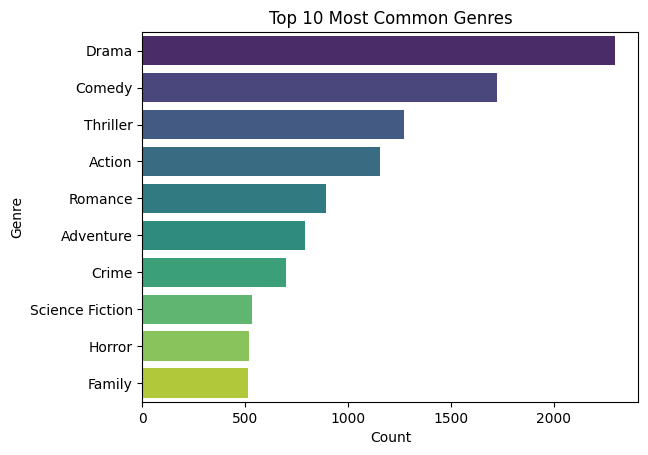

In [2]:
def extract_genres(genres_str):
    try:
        genres = json.loads(genres_str.replace("'", '"'))
        return [genre['name'] for genre in genres]
    except:
        return []

df['genre_list'] = df['genres'].apply(extract_genres)
genre_counts = pd.Series([genre for sublist in df['genre_list'] for genre in sublist]).value_counts().head(10)

# Plot
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4312\1944990113.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")


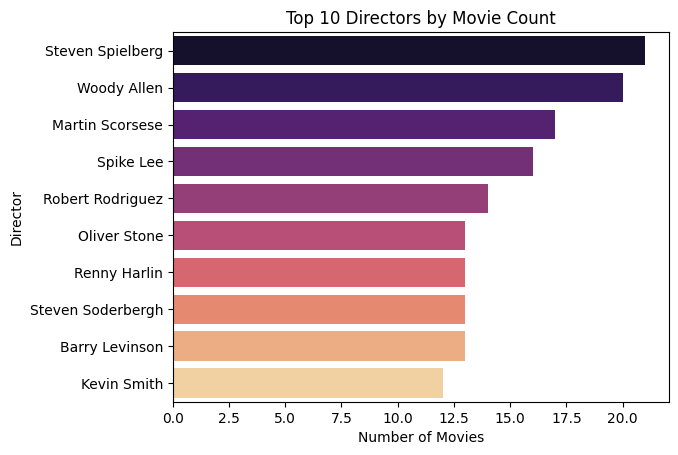

In [3]:
def extract_director(crew_str):
    try:
        crew = json.loads(crew_str.replace("'", '"'))
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
    except:
        return None

df['director'] = df['crew'].apply(extract_director)
top_directors = df['director'].value_counts().head(10)

# Plot
sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")
plt.title("Top 10 Directors by Movie Count")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4312\4157689865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit['profit'], y=top_profit['title_x'], palette="crest")


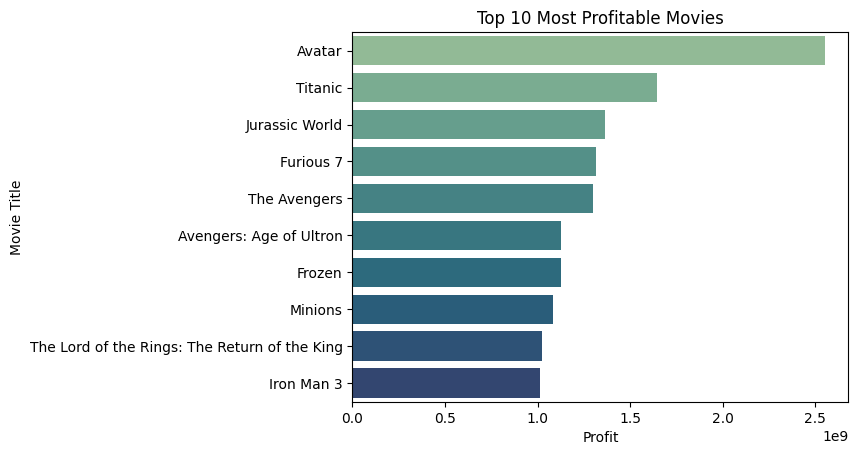

In [4]:
df['profit'] = df['revenue'] - df['budget']
top_profit = df[['title_x', 'profit']].sort_values(by='profit', ascending=False).head(10)

# Plot
sns.barplot(x=top_profit['profit'], y=top_profit['title_x'], palette="crest")
plt.title("Top 10 Most Profitable Movies")
plt.xlabel("Profit")
plt.ylabel("Movie Title")
plt.show()


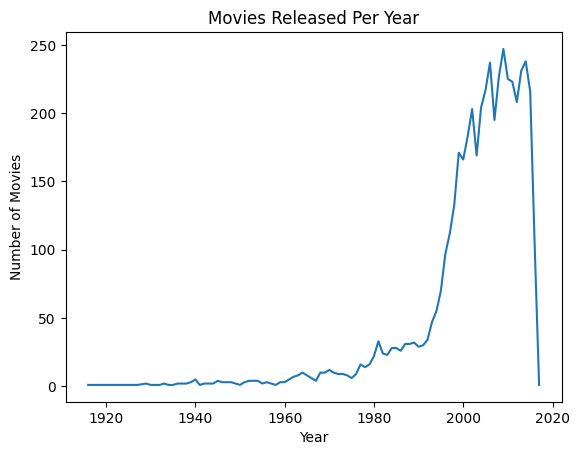

In [5]:
movies_per_year = df['release_year'].value_counts().sort_index()

# Plot
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


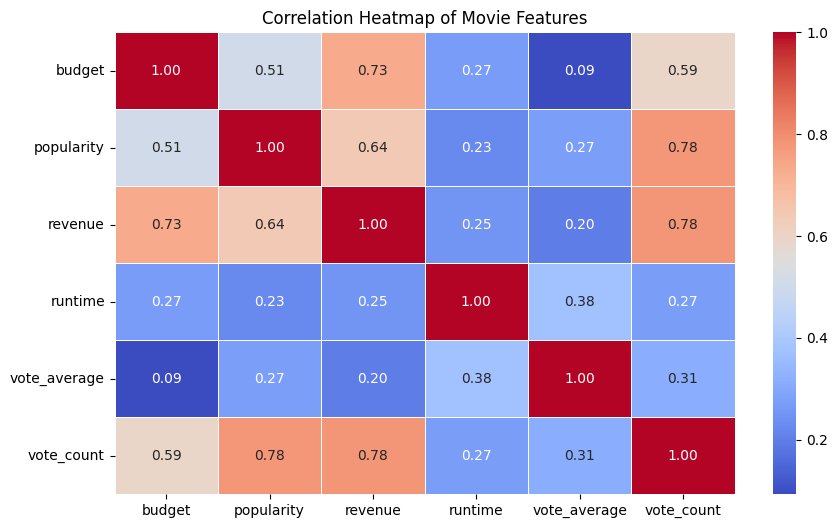

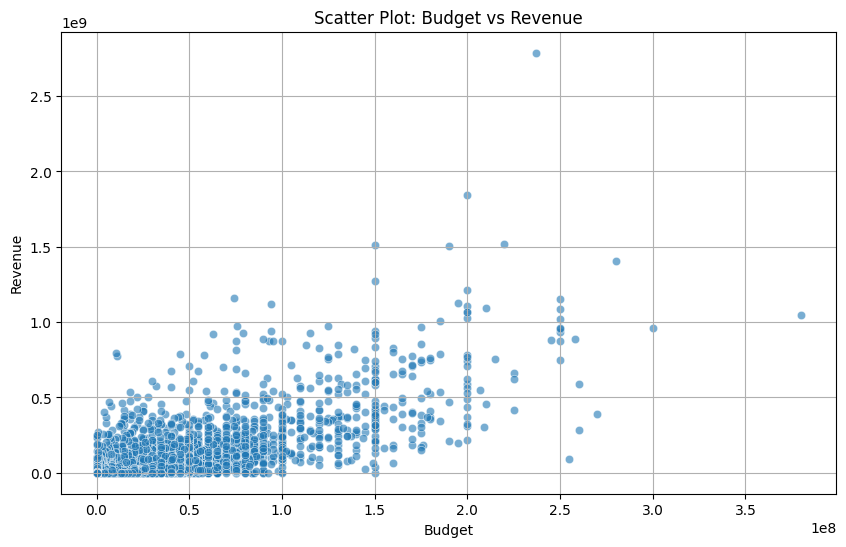

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("movies.csv")
numerical_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
df_numeric = df[numerical_columns].dropna()
plt.figure(figsize=(10, 6))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Movie Features")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6)
plt.title("Scatter Plot: Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()